In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm

sns.set_style('darkgrid')

In [2]:
def data_loader(files):
    out = []
    for file in tqdm(files):
        fs, data = wavfile.read(file)
        out.append(data)    
    out = np.array(out)
    return out

In [3]:
%%time

# 데이터 불러오기
x_data = glob('C:/data/cats_dog/cats_dogs/train/dog/*.wav')
x_data = data_loader(x_data)
x_data

0it [00:00, ?it/s]

Wall time: 21 ms


array([], dtype=float64)

In [4]:
%%time

fs, data = wavfile.read('C:/data/cats_dog/all/dog_barking_0.wav')
data = np.array(data)

Wall time: 2 ms


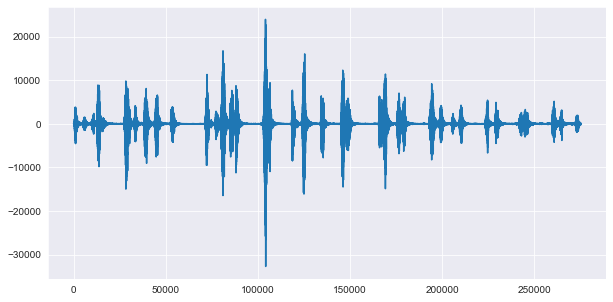

In [5]:
plt.figure(figsize=(10,5))
plt.plot(data)
plt.show()

C:\Users\TJOEUN~1\AppData\Local\Temp/ipykernel_7772/4194104977.py:6: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sig, sr, alpha=0.5)


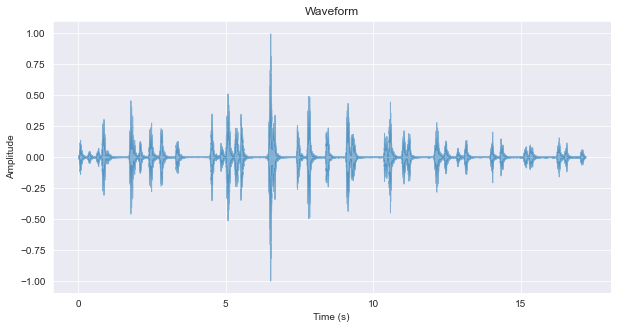

In [6]:
import librosa.display, librosa

sig, sr = librosa.load('C:/data/cats_dog/all/dog_barking_0.wav')

plt.figure(figsize=(10,5))
librosa.display.waveshow(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

Text(0.5, 1.0, 'Power spectrum')

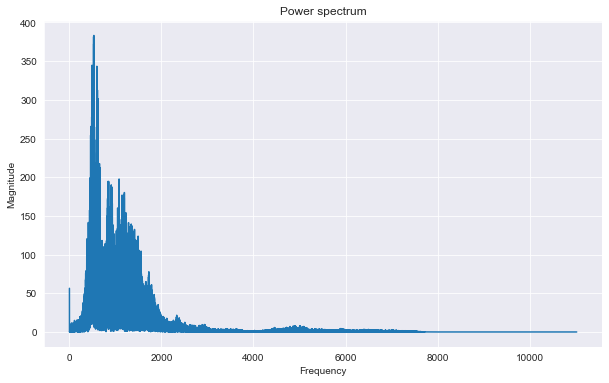

In [7]:
# fft: Fourier변환 -> Spectrum
# 푸리에 변환 함수: 시간과 공간에 대하여 항상 무조건 분해가 가능한 함수 -> 세상을 변화시켰다 -> 통신 분야, 컴퓨터 영상처리
# 각 진동수가 그 음향에 얼마나 들어있는지 알 수 있음, 음성 신호에 저음/고음의 양을 정량적으로 구한다. 
# 타임머신, 텔레포트(공간 이동), 블랙홀 

fft = np.fft.fft(sig)

magnitude = np.abs(fft) 

f = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure(figsize=(10,6))
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

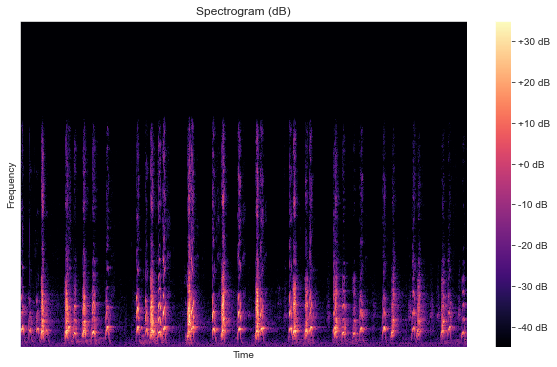

In [8]:
#Spectrogram, melspectrogram: 딥러닝 모델이 더 잘 이해할 수 있는 변환데이터

# spectrogram: 음성을 작게(0.01초) 잘라서 각 작은 조각에 푸리에 변환을 적용할 수 있음. 
#    이것을 STFT 이라고 부르고 일반적으로 이 결과의 L2 norm을 spectrogram이라고 부름.
#    Norm 은 벡터의 크기를 계산하는 방법이자 두 지점의 거리(차이)를 측정하는 방법이다. 

# melspectrogram: spectrogram에 mel-filter라는 필터를 적용해서 얻어짐.
# STFT(The Short-time Fourier transform) -> spectrogram
# 주파수폭포 라고도 함.
# 신호의 주파수 영역을 분석.

hop_length = 256
n_fft = 1024

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,6))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()